<a href="https://colab.research.google.com/github/neethu-vm/ML-project/blob/main/NFHData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Name : Neethu

Last Name  : VM

Start Date : 08/07/2021 


# Install All libraries needed 

In [6]:
!python3 -m pip install -U pip
!python3 -m pip install -U setuptools wheel
!python3 -m pip install -U "mxnet<2.0.0"
!python3 -m pip install autogluon 

     |████████████████████████████████| 1.6MB 30.0MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 818 kB 27.1 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.0.0
    Uninstalling setuptools-57.0.0:
      Successfully uninstalled setuptools-57.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 46.9 MB 42 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 250 kB 29.5 MB/s 
     |████████████████████████████████| 334 kB 66.0 MB/s 

In [7]:
import autogluon.core as ag

# imported autogluon

Installed All required installations 

In [8]:
from autogluon.tabular import TabularPredictor as task

In [9]:
import numpy as np

In [10]:
import pandas as pd

#mount to drive to access csv file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
PATH = "/content/drive/MyDrive/Colab Notebooks/nfldata6.csv"

# Load data to DataFrame

In [13]:

data = pd.read_csv(PATH)

data.head()

,_c0,Date(IST),NFO,NFH,NFL,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega
0,1,2020-01-02,12115.673242,12177.119957,12151.571552,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.397,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999
1,2,2020-01-03,12195.406448,12275.487382,12173.355954,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.20,879.0,973.0,-0.23,-0.510,-1.33,0.46,0.4430,0.5648,0.08,1.550000
2,3,2020-01-06,12272.929018,12299.127043,12181.887534,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.70,360.0,1502.0,-0.17,0.015,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000
3,4,2020-01-07,12237.309351,12242.227141,12030.371144,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.050,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000
4,5,2020-01-08,12149.137851,12192.474725,11985.555622,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.40,725.0,1109.0,0.56,0.305,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000


In [14]:
data.columns

Index(['_c0', 'Date(IST)', 'NFO', 'NFH', 'NFL', 'NFC', 'FIIB', 'FIIS', 'FIIN',
       'DIIB', 'DIIS', 'DIIN', 'August', 'December', 'CAD', 'DAD', 'DOD',
       'NDAD', 'Currey', 'Flow', 'Shine', 'Vega'],
      dtype='object')

In [15]:
data = data.drop(['_c0','Date(IST)'],axis=1)

#Dividing Dataset to 70% train and 30% test

In [16]:
size = int(0.7*data.shape[0])
train_df = data[:size]
test_df = data[size:]

In [17]:
train_df.head()

,NFO,NFH,NFL,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega
0,12115.673242,12177.119957,12151.571552,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.397,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999
1,12195.406448,12275.487382,12173.355954,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.20,879.0,973.0,-0.23,-0.510,-1.33,0.46,0.4430,0.5648,0.08,1.550000
2,12272.929018,12299.127043,12181.887534,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.70,360.0,1502.0,-0.17,0.015,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000
3,12237.309351,12242.227141,12030.371144,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.050,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000
4,12149.137851,12192.474725,11985.555622,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.40,725.0,1109.0,0.56,0.305,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000


In [18]:
test_df.head()
      

,NFO,NFH,NFL,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega
250,14682.481531,14714.912106,14480.442931,14573.937584,6715.91,6458.36,257.55,5146.41,5345.71,-199.30,1431.0,517.0,-0.10,0.3965,0.24,2.22,-0.0010,0.2139,0.25,-1.100000
251,14515.578392,14645.972963,14427.467418,14572.879876,7701.29,5412.24,2289.05,5084.73,5949.35,-864.62,997.0,937.0,-0.45,0.1000,1.02,1.41,-0.2290,0.0200,0.44,-1.660000
252,14551.584522,14693.201278,14517.302013,14655.403965,9104.25,7489.59,1614.66,5053.57,6093.05,-1039.48,601.0,1369.0,-0.03,0.1150,-1.01,-2.27,0.0405,-0.0240,-0.15,-0.260000
253,14703.493836,14771.798953,14553.138062,14647.997590,8326.77,8962.46,-635.69,4859.95,6150.30,-1290.35,477.0,1472.0,0.39,-0.0700,-0.06,-0.98,0.0146,-0.2160,-0.21,0.590000
254,14661.259872,14704.740581,14448.256300,14480.847650,8423.37,9188.67,-765.30,5090.23,5477.99,-387.76,501.0,1457.0,-1.03,-0.3550,-0.27,1.88,-0.0301,0.1574,-0.03,1.280001


In [19]:
train_df.shape

(250, 20)

In [20]:
test_df.shape

(108, 20)

In [21]:
train_data = task.Dataset(data=train_df)
test_data = task.Dataset(data=test_df)

In [22]:
print(train_data.head())

            NFO           NFH           NFL  ...    Flow  Shine      Vega
0  12115.673242  12177.119957  12151.571552  ...  0.0399  -0.10 -1.309999
1  12195.406448  12275.487382  12173.355954  ...  0.5648   0.08  1.550000
2  12272.929018  12299.127043  12181.887534  ... -0.0690  -0.18 -0.170000
3  12237.309351  12242.227141  12030.371144  ... -0.0208   0.08 -0.060000
4  12149.137851  12192.474725  11985.555622  ... -0.6992  -0.65 -0.340000

[5 rows x 20 columns]


In [23]:
print(test_data.head())

              NFO           NFH           NFL  ...    Flow  Shine      Vega
250  14682.481531  14714.912106  14480.442931  ...  0.2139   0.25 -1.100000
251  14515.578392  14645.972963  14427.467418  ...  0.0200   0.44 -1.660000
252  14551.584522  14693.201278  14517.302013  ... -0.0240  -0.15 -0.260000
253  14703.493836  14771.798953  14553.138062  ... -0.2160  -0.21  0.590000
254  14661.259872  14704.740581  14448.256300  ...  0.1574  -0.03  1.280001

[5 rows x 20 columns]


# set the column we have to predict

In [24]:
label_column = 'NFH'

In [25]:
train_data[label_column].describe()

count      250.000000
mean     11360.928219
std       1491.421586
min       7819.610704
25%      10381.973872
50%      11437.760114
75%      12176.188516
max      14730.963589
Name: NFH, dtype: float64

#Fitting the model for predictions on First dependent variable NFH

In [26]:
metric = 'rmse'
predictor = task(label=label_column, eval_metric=metric).fit(train_data, presets=['best_quality'], time_limit=30)

No path specified. Models will be saved in: "AutogluonModels/ag-20210710_050924/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "AutogluonModels/ag-20210710_050924/"
AutoGluon Version:  0.2.0
Train Data Rows:    250
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (14730.963588851202, 7819.61070394115, 11360.92822, 1491.42159)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12668.41 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type 

[1000]	train_set's rmse: 62.349	valid_set's rmse: 262.45


	-232.398	 = Validation root_mean_squared_error score
	3.09s	 = Training runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 26.42s of the 26.41s of remaining time.


[1000]	train_set's rmse: 10.8902	valid_set's rmse: 244.566
[2000]	train_set's rmse: 1.9533	valid_set's rmse: 244.242


	-195.7911	 = Validation root_mean_squared_error score
	1.37s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 24.9s of the 24.89s of remaining time.
	-75.9332	 = Validation root_mean_squared_error score
	0.72s	 = Training runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 24.07s of the 24.06s of remaining time.
	-174.4966	 = Validation root_mean_squared_error score
	16.91s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 7.12s of the 7.11s of remaining time.
	-69.703	 = Validation root_mean_squared_error score
	0.61s	 = Training runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 6.4s of the 6.39s of remaining time.
	Ran out of time, stopping training early.
	Time limit exceeded... Skipping NeuralNetFastAI_BAG_L1.
Completed 1/20 k-fold bagging repeats ...
Fit

In [27]:
y_test = test_data[label_column]  # values to predict
test_data_nolab = test_data.drop(labels=[label_column],axis=1)  # delete label column to prove we're not cheating
print(test_data_nolab.head())

              NFO           NFL           NFC  ...    Flow  Shine      Vega
250  14682.481531  14480.442931  14573.937584  ...  0.2139   0.25 -1.100000
251  14515.578392  14427.467418  14572.879876  ...  0.0200   0.44 -1.660000
252  14551.584522  14517.302013  14655.403965  ... -0.0240  -0.15 -0.260000
253  14703.493836  14553.138062  14647.997590  ... -0.2160  -0.21  0.590000
254  14661.259872  14448.256300  14480.847650  ...  0.1574  -0.03  1.280001

[5 rows x 19 columns]


# Do the predictions on test data

In [28]:
y_pred = predictor.predict(test_data_nolab)
print("Predictions:  ", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -695.4339850112682
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -695.4339850112682,
    "mean_squared_error": -483628.42750865285,
    "mean_absolute_error": -553.7408425288481,
    "r2": -1.0577119786543676,
    "pearsonr": 0.5754980619352394,
    "median_absolute_error": -411.5311998924999
}


Predictions:   250    14541.677734
251    14523.267578
252    14625.293945
253    14637.854492
254    14566.880859
           ...     
353    14583.158203
354    14636.631836
355    14604.518555
356    14578.746094
357    14581.007812
Name: NFH, Length: 108, dtype: float32


# Summary of Fit

In [29]:
result = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2  -69.474949       0.157894   1.595544                0.000597           0.267265            2       True          8
1    ExtraTreesMSE_BAG_L1  -69.702953       0.080524   0.613188                0.080524           0.613188            1       True          7
2  RandomForestMSE_BAG_L1  -75.933222       0.076772   0.715091                0.076772           0.715091            1       True          5
3         CatBoost_BAG_L1 -174.496634       0.005226  16.908813                0.005226          16.908813            1       True          6
4         LightGBM_BAG_L1 -195.791056       0.013330   1.371999                0.013330           1.371999            1       True          4
5       LightGBMXT_BAG_L1 -232.397994       0.015311   3.086787                0.01531

In [30]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  regression
AutoGluon identified the following types of features:
('float', []) : 19 | ['NFO', 'NFL', 'NFC', 'FIIB', 'FIIS', ...]


# Leader board of test data

In [31]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesMSE_BAG_L1,-691.747604,-69.702953,0.112955,0.080524,0.613188,0.112955,0.080524,0.613188,1,True,7
1,WeightedEnsemble_L2,-695.433985,-69.474949,0.229721,0.157894,1.595544,0.002192,0.000597,0.267265,2,True,8
2,RandomForestMSE_BAG_L1,-715.691356,-75.933222,0.114574,0.076772,0.715091,0.114574,0.076772,0.715091,1,True,5
3,LightGBM_BAG_L1,-1204.516899,-195.791056,0.042672,0.013330,1.371999,0.042672,0.013330,1.371999,1,True,4
4,LightGBMXT_BAG_L1,-1257.240143,-232.397994,0.057893,0.015311,3.086787,0.057893,0.015311,3.086787,1,True,3
5,CatBoost_BAG_L1,-1323.746071,-174.496634,0.014987,0.005226,16.908813,0.014987,0.005226,16.908813,1,True,6
6,KNeighborsUnif_BAG_L1,-1358.187481,-416.363969,0.102886,0.103956,0.004422,0.102886,0.103956,0.004422,1,True,1
7,KNeighborsDist_BAG_L1,-1358.360124,-397.407868,0.102637,0.104558,0.001401,0.102637,0.104558,0.001401,1,True,2


# checking for each models seperately

In [32]:
predictor.predict(test_data, model='WeightedEnsemble_L2')


250    14541.677734
251    14523.267578
252    14625.293945
253    14637.854492
254    14566.880859
           ...     
353    14583.158203
354    14636.631836
355    14604.518555
356    14578.746094
357    14581.007812
Name: NFH, Length: 108, dtype: float32

# Faster presets / Hyperparameter

In [33]:
presets = ['high_quality_fast_inference_only_refit','best_quality']
time_limits = 2*60
predictor_light = task(label=label_column, eval_metric=metric).fit(train_data,presets=presets)


No path specified. Models will be saved in: "AutogluonModels/ag-20210710_051006/"
Presets specified: ['high_quality_fast_inference_only_refit', 'best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210710_051006/"
AutoGluon Version:  0.2.0
Train Data Rows:    250
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (14730.963588851202, 7819.61070394115, 11360.92822, 1491.42159)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10880.87 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memo

[1000]	train_set's rmse: 62.349	valid_set's rmse: 262.45


	-232.398	 = Validation root_mean_squared_error score
	1.35s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ...


[1000]	train_set's rmse: 10.8902	valid_set's rmse: 244.566
[2000]	train_set's rmse: 1.9533	valid_set's rmse: 244.242


	-195.7911	 = Validation root_mean_squared_error score
	1.49s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ...
	-75.9332	 = Validation root_mean_squared_error score
	0.71s	 = Training runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ...
	-174.4784	 = Validation root_mean_squared_error score
	33.48s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ...
	-69.703	 = Validation root_mean_squared_error score
	0.61s	 = Training runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ...
	-11254.1944	 = Validation root_mean_squared_error score
	8.51s	 = Training runtime
	0.09s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ...
	-77.7854	 = Validation root_mean_squared_error score
	2.16s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ...
	-224.9167	 = Validation root_mean_squared_error score
	13.53s	 = Training runtime
	0.66s	 = Validati

# more lightweight hyperparameters

In [34]:
predictor_light = task(label=label_column, eval_metric=metric).fit(train_data,hyperparameters='very_light')


No path specified. Models will be saved in: "AutogluonModels/ag-20210710_051125/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210710_051125/"
AutoGluon Version:  0.2.0
Train Data Rows:    250
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (14730.963588851202, 7819.61070394115, 11360.92822, 1491.42159)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10780.74 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_m

In [35]:
y_pred = predictor.predict(test_data_nolab)
print("Predictions:  ", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -695.4339850112682
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -695.4339850112682,
    "mean_squared_error": -483628.42750865285,
    "mean_absolute_error": -553.7408425288481,
    "r2": -1.0577119786543676,
    "pearsonr": 0.5754980619352394,
    "median_absolute_error": -411.5311998924999
}


Predictions:   250    14541.677734
251    14523.267578
252    14625.293945
253    14637.854492
254    14566.880859
           ...     
353    14583.158203
354    14636.631836
355    14604.518555
356    14578.746094
357    14581.007812
Name: NFH, Length: 108, dtype: float32


# summary

In [36]:
result = predictor_light.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model     score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2    -74.207283       0.153034  8.354407                0.000558           0.240340            2       True          7
1              XGBoost    -82.384885       0.003059  0.349658                0.003059           0.349658            1       True          5
2             CatBoost   -140.830682       0.001941  4.273191                0.001941           4.273191            1       True          3
3             LightGBM   -145.308477       0.003896  0.375789                0.003896           0.375789            1       True          1
4           LightGBMXT   -172.384294       0.003422  0.261156                0.003422           0.261156            1       True          2
5       NeuralNetMXNet   -236.931859       0.143581  3.115428                0.143581           3.

# excluding some models and again predict

In [37]:
excluded_model_types = ['NeuralNetFastAI','NeuralNetMXNet','LightGBMXT']
predictor_light = task(label=label_column, eval_metric=metric).fit(train_data,excluded_model_types=excluded_model_types)

No path specified. Models will be saved in: "AutogluonModels/ag-20210710_051137/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210710_051137/"
AutoGluon Version:  0.2.0
Train Data Rows:    250
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (14730.963588851202, 7819.61070394115, 11360.92822, 1491.42159)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10776.22 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_m

In [38]:
result = predictor_light.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model     score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2    -64.304593       0.111556  5.894368                0.000515           0.410047            2       True         12
1         ExtraTreesMSE    -70.876153       0.102183  0.509546                0.102183           0.509546            1       True          7
2               XGBoost    -82.384885       0.002812  0.327225                0.002812           0.327225            1       True          9
3       RandomForestMSE    -90.583745       0.102164  0.611641                0.102164           0.611641            1       True          5
4         LightGBMLarge    -94.470588       0.004024  0.630653                0.004024           0.630653            1       True         11
5              CatBoost   -140.830682       0.001894  4.272076                0.001894      

#Using smaller ensemble or faster model for prediction

In [39]:
additional_ensembles = predictor.fit_weighted_ensemble(expand_pareto_frontier=True)
print("Alternative ensembles you can use for prediction:", additional_ensembles)

predictor.leaderboard(only_pareto_frontier=True, silent=True)

Fitting model: WeightedEnsemble_L2Best_Pareto1 ...
	-163.3152	 = Validation root_mean_squared_error score
	0.09s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2Best_Pareto2 ...
	-163.3152	 = Validation root_mean_squared_error score
	0.14s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2Best_Pareto3 ...
	-75.6968	 = Validation root_mean_squared_error score
	0.16s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2Best_Pareto4 ...
	-69.4749	 = Validation root_mean_squared_error score
	0.2s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2Best_Pareto5 ...
	-69.4749	 = Validation root_mean_squared_error score
	0.25s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2Best ...
	-69.4749	 = Validation root_mean_squared_error score
	0.28s	 = Training runtime
	0.0s	 = Validation runtime


Alternative ensembles you can use for prediction: ['WeightedEnsemble_L2Best_Pareto1', 'WeightedEnsemble_L2Best_Pareto2', 'WeightedEnsemble_L2Best_Pareto3', 'WeightedEnsemble_L2Best_Pareto4', 'WeightedEnsemble_L2Best_Pareto5', 'WeightedEnsemble_L2Best']


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2Best,-69.474949,0.157795,1.603391,0.000498,0.275112,2,True,14
1,ExtraTreesMSE_BAG_L1,-69.702953,0.080524,0.613188,0.080524,0.613188,1,True,7
2,RandomForestMSE_BAG_L1,-75.933222,0.076772,0.715091,0.076772,0.715091,1,True,5
3,WeightedEnsemble_L2Best_Pareto1,-163.315236,0.019069,18.375017,0.000514,0.094204,2,True,9
4,CatBoost_BAG_L1,-174.496634,0.005226,16.908813,0.005226,16.908813,1,True,6


# HyperParameter Tuning

In [40]:
predictor = task(label=label_column, eval_metric=metric).fit(train_data,
    num_bag_folds=5, num_bag_sets=1, num_stack_levels=1,
    hyperparameters = {'NN': {'num_epochs': 2}, 'GBM': {'num_boost_round': 20}},  # last  argument is just for quick demo here, omit it in real applications
)


No path specified. Models will be saved in: "AutogluonModels/ag-20210710_051151/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210710_051151/"
AutoGluon Version:  0.2.0
Train Data Rows:    250
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (14730.963588851202, 7819.61070394115, 11360.92822, 1491.42159)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10777.44 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_m

In [41]:
result = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model    score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBM_BAG_L2  -591.371149       0.658062  2.840420                0.008776           0.599552            2       True          4
1    WeightedEnsemble_L3  -591.371149       0.658582  2.928456                0.000520           0.088035            3       True          6
2        LightGBM_BAG_L1  -598.034643       0.008761  0.623884                0.008761           0.623884            1       True          1
3    WeightedEnsemble_L2  -598.034643       0.009325  0.717370                0.000564           0.093486            2       True          3
4  NeuralNetMXNet_BAG_L1 -1428.612815       0.640525  1.616985                0.640525           1.616985            1       True          2
5  NeuralNetMXNet_BAG_L2 -1522.299073       1.285027  3.853593                0.635741      

In [42]:
import matplotlib.pyplot as plt


In [43]:
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model    score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBM_BAG_L2  -591.371149       0.658062  2.840420                0.008776           0.599552            2       True          4
1    WeightedEnsemble_L3  -591.371149       0.658582  2.928456                0.000520           0.088035            3       True          6
2        LightGBM_BAG_L1  -598.034643       0.008761  0.623884                0.008761           0.623884            1       True          1
3    WeightedEnsemble_L2  -598.034643       0.009325  0.717370                0.000564           0.093486            2       True          3
4  NeuralNetMXNet_BAG_L1 -1428.612815       0.640525  1.616985                0.640525           1.616985            1       True          2
5  NeuralNetMXNet_BAG_L2 -1522.299073       1.285027  3.853593                0.635741      

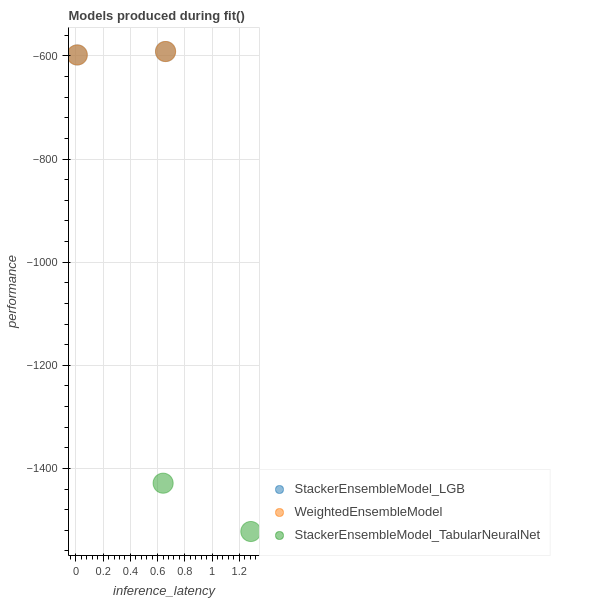

# Documentation


 # Objective

 The objective of the problem is to predict the NFH values based on the given data set. Here the data set have columns 'Date(IST)', 'NFO', 'NFH', 'NFL', 'NFC', 'FIIB', 'FIIS', 'FIIN','DIIB', 'DIIS', 'DIIN', 'August', 'December', 'CAD', 'DAD', 'DOD''NDAD', 'Currey', 'Flow', 'Shine', 'Vega'. 

 # Data Cleaning

 First do the data cleaning process, dropped 2 columns index and date columns.

# Data Split

Split the train and Test data with ratio 70%-30%

# Model Training

Select the label class to predict.
Fit() and Predictions performed based on the autogluon models 

# do Hyperparametr tuning and ensemble techniques

 1.preprocesses raw data (identifies the type of each feature)

 2.identifies what type of prediction problem this is (binary/multi-class classification or regression) 

 3.splits data appropriately   (eg.training/validation sets, k-fold split)

 4.individually trains/tunes various models (RandomForest/ExtraTrees, KNN, 
 NeuralNet, GBDT)

 5.assembles ensemble that outperforms all the individual models

 6. Plot the HPO summary graph which will be get at summary report as html file.